<a href="https://colab.research.google.com/github/lorens247/FTS/blob/main/pyPOP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install pyFTS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Enrollments.csv to Enrollments.csv


   Year  Enrollments
0  2006      3233366
1  2007      3321854
2  2008      3412667
3  2009      3506165
4  2010      3602121
5  2011      3700219
6  2012      3799996
7  2013      3898048
8  2014      4012946
9  2015      4122820


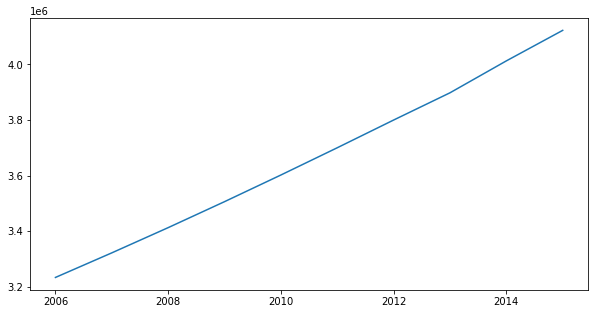

In [4]:
from pyFTS.data import Enrollments
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,5])
df = Enrollments.get_dataframe()
plt.plot(df['Year'],df['Enrollments'])
data = df['Enrollments'].values
print (df)

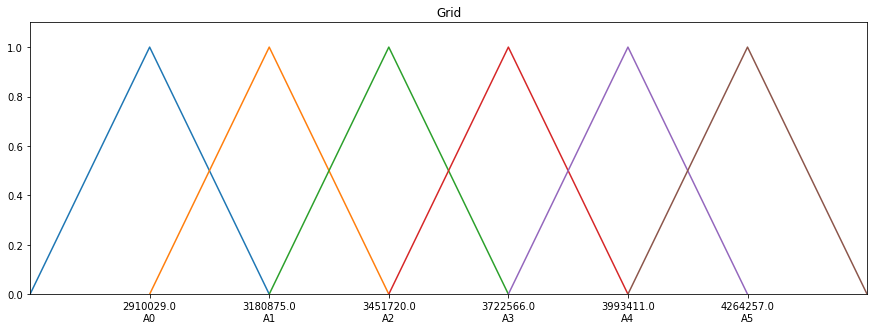

In [5]:
# Universe of Discourse Partitioner
from pyFTS.partitioners import Grid
fs = Grid.GridPartitioner(data=data,npart=6)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])
fs.plot(ax)

In [6]:
# Population Growth fuzzy set
# VLPG = Very Low Population Growth (A0)
# LPG = Low Population Growth (A1)
# MPG = Moderate Population Growth (A2)
# NPG = Normal Population Growth (A3)
# HPG = High Population Growth (A4)
# VHPG = Very High Population Growth (A5)

fuzzyfied = fs.fuzzyfy(data, method='maximum', mode='sets')
fuzzyfied

['A1', 'A2', 'A2', 'A2', 'A3', 'A3', 'A3', 'A4', 'A4', 'A4']

In [7]:
from pyFTS.common import FLR
patterns = FLR.generate_non_recurrent_flrs(fuzzyfied)
print([str(k) for k in patterns])

['A1 -> A2', 'A2 -> A2', 'A2 -> A3', 'A3 -> A3', 'A3 -> A4', 'A4 -> A4']


In [8]:
# Triangular Membership Function

from pyFTS.models import chen
model = chen.ConventionalFTS(partitioner=fs)
model.fit(data)
print(model)

Conventional FTS:
A1 -> A2
A2 -> A2,A3
A3 -> A3,A4
A4 -> A4



In [9]:
fuzzyfied = fs.fuzzyfy(3233366, method='maximum', mode='sets') 
print(fuzzyfied)
fuzzyfied = fs.fuzzyfy(3321854, method='maximum', mode='sets')
print(fuzzyfied)
fuzzyfied = fs.fuzzyfy(3412667, method='maximum', mode='sets')
print(fuzzyfied)
fuzzyfied = fs.fuzzyfy(3506165, method='maximum', mode='sets')
print(fuzzyfied)
fuzzyfied = fs.fuzzyfy(3602121, method='maximum', mode='sets')
print(fuzzyfied)
fuzzyfied = fs.fuzzyfy(3700219, method='maximum', mode='sets')
print(fuzzyfied)
fuzzyfied = fs.fuzzyfy(3799996, method='maximum', mode='sets')
print(fuzzyfied)
fuzzyfied = fs.fuzzyfy(3898048, method='maximum', mode='sets')
print(fuzzyfied)
fuzzyfied = fs.fuzzyfy(4012946, method='maximum', mode='sets')
print(fuzzyfied)
fuzzyfied = fs.fuzzyfy(4122820, method='maximum', mode='sets')
print(fuzzyfied)

A1
A2
A2
A2
A3
A3
A3
A4
A4
A4


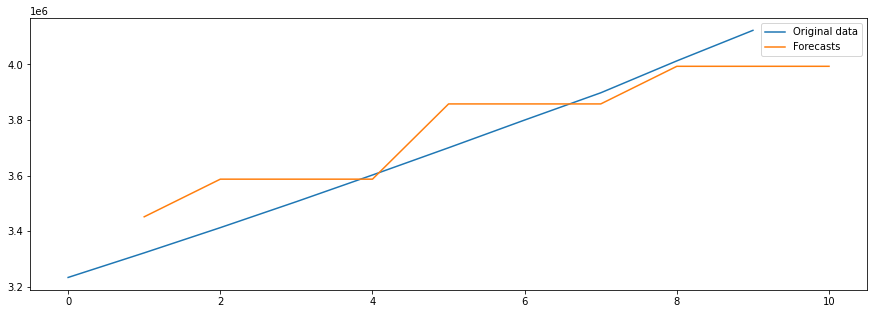

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])
forecasts = model.predict(data)
forecasts.insert(0,None)
orig, = plt.plot(data, label="Original data")
pred, = plt.plot(forecasts, label="Forecasts")
plt.legend()

In [11]:
print(forecasts)

[None, 3451720.266666666, 3587142.9833333325, 3587142.9833333325, 3587142.9833333325, 3857988.416666666, 3857988.416666666, 3857988.416666666, 3993411.1333333324, 3993411.1333333324, 3993411.1333333324]


In [12]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
d = [None, 3451720.266666666, 3587142.9833333325, 3587142.9833333325, 3587142.9833333325, 3857988.416666666, 3857988.416666666, 3857988.416666666, 3993411.1333333324, 3993411.1333333324, 3993411.1333333324]
df = pd.DataFrame(d, columns = ['Forecasts']) 

print(df)

      Forecasts
0           NaN
1  3,451,720.27
2  3,587,142.98
3  3,587,142.98
4  3,587,142.98
5  3,857,988.42
6  3,857,988.42
7  3,857,988.42
8  3,993,411.13
9  3,993,411.13
10 3,993,411.13
